<a href="https://colab.research.google.com/github/Darafarm/Darafarm/blob/main/Hands_on_Using_fashion_mnist_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential

In [ ]:
(train_x, train_y), (test_x, test_y) =  tf.keras.datasets.fashion_mnist.load_data()


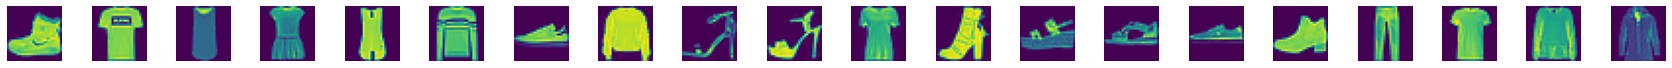

label of the each above: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


In [ ]:
plt.figure(figsize = (30,1))
for i in range (2):
  plt.subplot(1, 20, i + 1)
  plt.imshow(train_x[i])
  plt.axis ('off')
plt.show()
print('label of the each above: %s' % train_y[0:20])
# plt.imshow(train_y[1], cmap = 'gray') 


In [ ]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
# Data Preprocessing
# reshaping the data, that is, (60000, 28 x 28) into (n, 728)
model.add(tf.keras.layers.Reshape((784,), input_shape = ( 28,28,)))

In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes= 10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes= 10)
# train_y = to_categorical(train_y)
# test_y = to_categorical(train_y)

In [ ]:
train_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((60000, 28, 28), (10000, 28, 28), (60000, 10), (10000, 10))

In [ ]:
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#model = tf.keras.models.Sequential()

In [ ]:
# input layer 
#model.add(tf.keras.layers.Dense(np.reshapinput_shape = (728,)))
# 1st layer
model.add(tf.keras.layers.Dense(50, activation = 'sigmoid'))
model.add(tf.keras.layers.BatchNormalization())
#2nd layer
model.add(tf.keras.layers.Dense(50, activation = 'sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
#3rd layer
model.add(tf.keras.layers.Dense(50, activation = 'sigmoid'))
#4th layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [ ]:
# strochastic gradient descent 
sgd = tf.keras.optimizers.SGD(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = (['accuracy']))

In [ ]:
model.fit(train_x, train_y, batch_size = 200, epochs = 100, validation_data= (test_x, test_y))


Epoch 1/100
300/300 [==============================] - 4s 9ms/step - loss: 2.2541 - accuracy: 0.2734 - val_loss: 2.2716 - val_accuracy: 0.5603
Epoch 2/100
300/300 [==============================] - 2s 8ms/step - loss: 2.1184 - accuracy: 0.6041 - val_loss: 2.1083 - val_accuracy: 0.8388
Epoch 3/100
300/300 [==============================] - 3s 9ms/step - loss: 1.9769 - accuracy: 0.7658 - val_loss: 1.8978 - val_accuracy: 0.8519
Epoch 4/100
300/300 [==============================] - 3s 9ms/step - loss: 1.8026 - accuracy: 0.8216 - val_loss: 1.7007 - val_accuracy: 0.8486
Epoch 5/100
300/300 [==============================] - 3s 9ms/step - loss: 1.6012 - accuracy: 0.8473 - val_loss: 1.4881 - val_accuracy: 0.8528
Epoch 6/100
300/300 [==============================] - 3s 9ms/step - loss: 1.3856 - accuracy: 0.8614 - val_loss: 1.2770 - val_accuracy: 0.8557
Epoch 7/100
300/300 [==============================] - 2s 8ms/step - loss: 1.1816 - accuracy: 0.8716 - val_loss: 1.0880 - val_accuracy: 0.8579

In [ ]:
result = model.evaluate(test_x, test_y )

313/313 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.8685


In [ ]:
predictions  = model.predict([test_x])

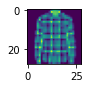

6


In [ ]:

import numpy as np
plt.figure(figsize = (1, 1))
plt.imshow(test_x[7], )
# plt.imshow(np.argmax(predictions[0]) )
plt.show()
print(np.argmax(predictions[7]))

In [ ]:

import h5py